# **🌍 Big Picture: What Are We Trying to Achieve?**

Before building any predictive model, it is critical to understand the data, the people behind the data, and the business logic driving insurance pricing.

Insurance premiums are not just numbers — they represent:

    Individual health risks

    Long-term financial exposure for insurers

    Fairness and transparency for customers

The goal of Block 2 is to transform raw data into meaningful insights that explain why premiums vary across individuals and which factors truly matter.

# **🧠 Why EDA & Hypothesis Testing Matter in Insurance**

In the insurance domain:

      Wrong assumptions = financial loss

      Hidden bias = unfair pricing

      Black-box logic = regulatory risk

This block ensures that:

      ✔ Our assumptions are data-backed

      ✔ Our features are relevant and justified

      ✔ Our future models are interpretable and trustworthy

We are not just predicting premiums — we are validating the logic behind them.

**Objectives**

By the end of this block, we will:

Understand the distribution of key variables like age, weight, surgeries, and premium cost

Identify key risk drivers that influence insurance pricing

Detect unusual or extreme cases (outliers) and decide how to handle them responsibly

Statistically validate assumptions commonly used in insurance pricing

Create a strong analytical foundation for feature selection and modeling

**Exploratory Data Analysis (EDA)**

EDA helps us understand customer profiles, health conditions, and how insurance premiums behave.

We focus on:

        Distributions: Age, health metrics, surgeries, and premium prices to identify spread, skewness, and patterns.

        Correlations: Relationships between premium cost and key factors like age, surgeries, and chronic diseases using heatmaps.

        Outliers: Detect extreme premium values using IQR and Z-scores, recognizing that outliers often represent high-risk policyholders.

**Hypothesis Testing**

EDA shows patterns; hypothesis testing confirms whether they are statistically significant. We test:

        Impact of chronic diseases on premium cost (T-test)

        Effect of number of major surgeries on premiums (ANOVA)

        Influence of diabetes and blood pressure on pricing (T-tests / regression)

        Associations between health conditions (Chi-square)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
# Checking for structures, types and statistics
# Basic info
print("Data info:")
df.info()

print()

# Quick shape check
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print()
# Optional: summary of column types
print(df.dtypes.value_counts())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB

Rows: 986, Columns: 11

int64    11
Name: count, dtype: int64


In [8]:
# Summary Statistics
# Numerical summary
num_summary = df.describe()
display(num_summary)

# Categorical summary
cat_cols = df.select_dtypes(include=['object','category','bool']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [9]:
# Identify Missing or Inconsistent Values
# Missing values count
missing_df = df.isnull().sum().to_frame(name='MissingCount')
missing_df['MissingPercent'] = (missing_df['MissingCount'] / len(df)) * 100
display(missing_df[missing_df['MissingCount'] > 0])

# Optional: Inspect inconsistent values
# Example: Age should be positive
if 'age' in df.columns:
    print(df[df['age'] < 0])

,MissingCount,MissingPercent


In [10]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [4]:
binary_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
               'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

In [5]:
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({0: 'No', 1: 'Yes'}).astype('category')

# Confirm conversion
df[binary_cols].dtypes

,0
Diabetes,category
BloodPressureProblems,category
AnyTransplants,category
AnyChronicDiseases,category
KnownAllergies,category
HistoryOfCancerInFamily,category


In [6]:
# Numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print("Categorical columns:", categorical_cols)

Numeric columns: ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']
Categorical columns: ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']


In [16]:
# Combine numeric summary + categorical counts
print("=== Numeric Summary ===")
display(df.describe())

print("=== Categorical Summary ===")
for col in binary_cols:
    print(f"\n{col} Value Counts:")
    display(df[col].value_counts())


=== Numeric Summary ===


,Age,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,168.182556,76.950304,0.667343,24336.713996
std,13.963371,10.098155,14.265096,0.749205,6248.184382
min,18.000000,145.000000,51.000000,0.000000,15000.000000
25%,30.000000,161.000000,67.000000,0.000000,21000.000000
50%,42.000000,168.000000,75.000000,1.000000,23000.000000
75%,53.000000,176.000000,87.000000,1.000000,28000.000000
max,66.000000,188.000000,132.000000,3.000000,40000.000000


=== Categorical Summary ===

Diabetes Value Counts:


,count
Diabetes,
No,572
Yes,414



BloodPressureProblems Value Counts:


,count
BloodPressureProblems,
No,524
Yes,462



AnyTransplants Value Counts:


,count
AnyTransplants,
No,931
Yes,55



AnyChronicDiseases Value Counts:


,count
AnyChronicDiseases,
No,808
Yes,178



KnownAllergies Value Counts:


,count
KnownAllergies,
No,774
Yes,212



HistoryOfCancerInFamily Value Counts:


,count
HistoryOfCancerInFamily,
No,870
Yes,116


# **DISTRIBUTION ANALYSIS - UNIVARIATE, BIVARIATE AND MULTIVARIATE ANALYSIS**

**UNIVARIATE ANALYSIS**

In [7]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


In [8]:
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})

skew_kurt


,Skewness,Kurtosis
Age,0.029895,-1.131720
Height,-0.179788,-0.761975
Weight,0.666726,0.610280
NumberOfMajorSurgeries,0.861334,0.066209
PremiumPrice,0.097639,-0.452895


Interpretation:

Skewness

greater than 0 → right-skewed (common in PremiumPrice, Weight)

less than 0 → left-skewed

Kurtosis

greater than 3 → heavy tails / outliers

less than 3 → light-tailed

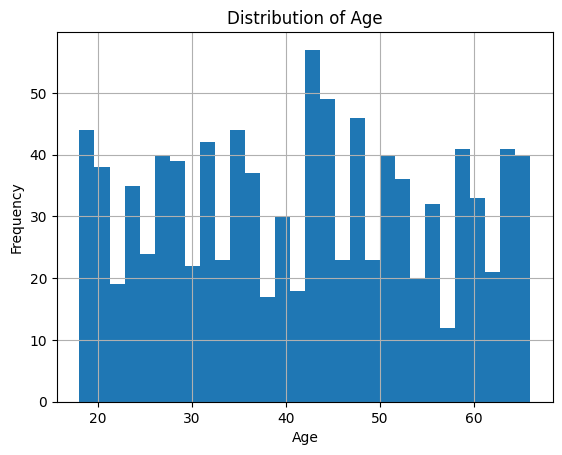

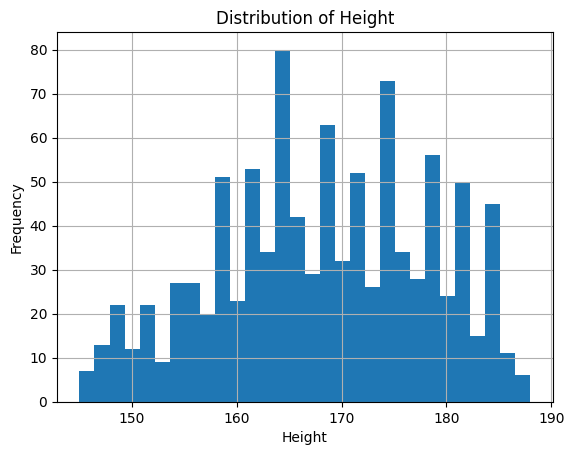

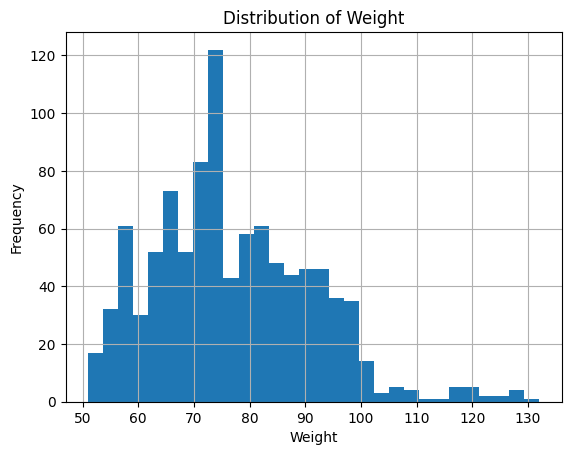

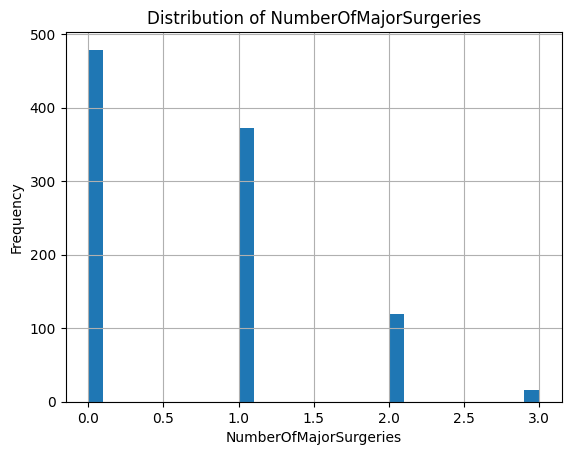

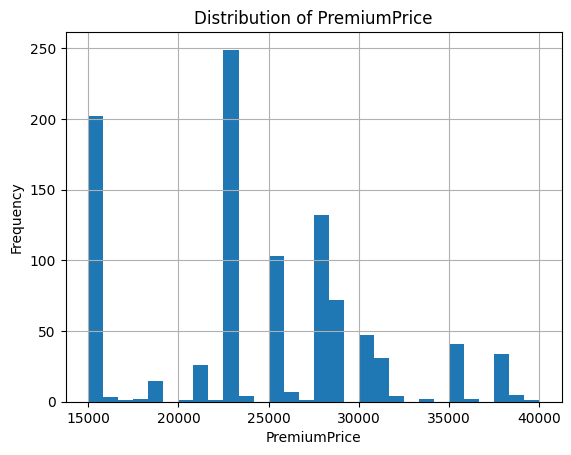

In [9]:
# Distribution Plots (Spread + Skewness)
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

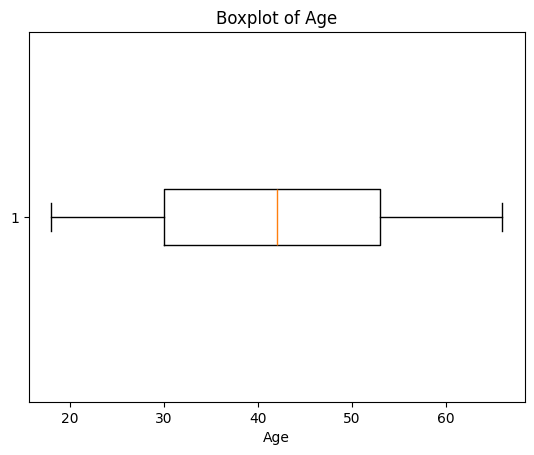

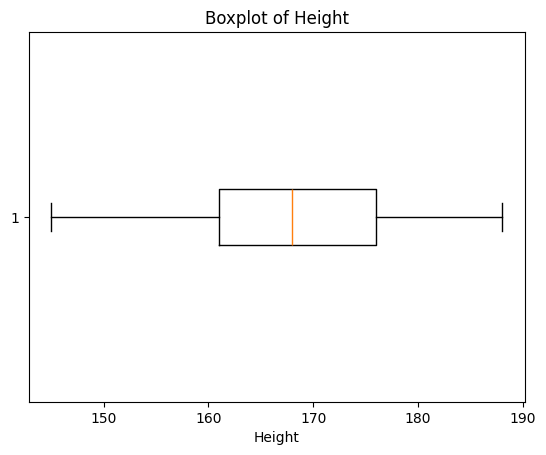

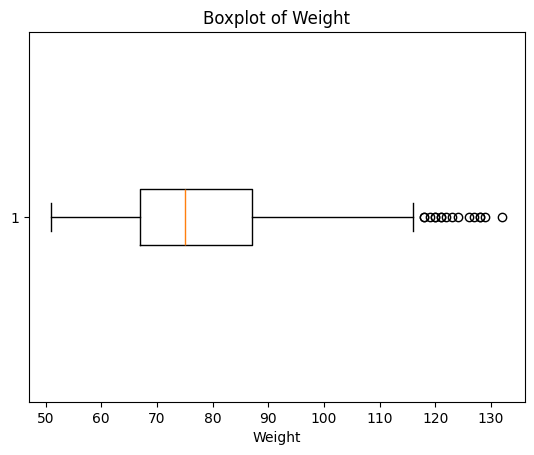

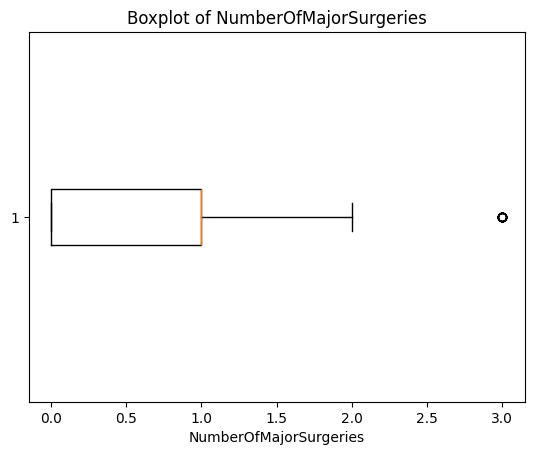

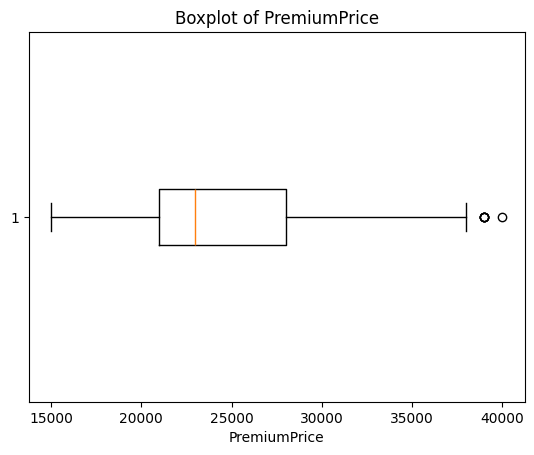

In [10]:
# Boxplots (Outlier Detection)
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [11]:
# Statistical Outlier Detection (IQR Method)
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

for col in numeric_cols:
    outliers = iqr_outliers(df[col])
    print(f"{col}: {outliers.shape[0]} outliers")


Age: 0 outliers
Height: 0 outliers
Weight: 16 outliers
NumberOfMajorSurgeries: 16 outliers
PremiumPrice: 6 outliers


In [12]:
# Normality Check (Optional but Professional)
for col in numeric_cols:
    stat, p = stats.shapiro(df[col].sample(min(5000, len(df))))
    print(f"{col}: p-value={p:.4f}")


Age: p-value=0.0000
Height: p-value=0.0000
Weight: p-value=0.0000
NumberOfMajorSurgeries: p-value=0.0000
PremiumPrice: p-value=0.0000


**Univariate Analysis – Categorical Variables**

In [13]:
# Frequency Distribution
for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True) * 100)


Diabetes
Diabetes
No     572
Yes    414
Name: count, dtype: int64
Diabetes
No     58.01217
Yes    41.98783
Name: proportion, dtype: float64

BloodPressureProblems
BloodPressureProblems
No     524
Yes    462
Name: count, dtype: int64
BloodPressureProblems
No     53.144016
Yes    46.855984
Name: proportion, dtype: float64

AnyTransplants
AnyTransplants
No     931
Yes     55
Name: count, dtype: int64
AnyTransplants
No     94.421907
Yes     5.578093
Name: proportion, dtype: float64

AnyChronicDiseases
AnyChronicDiseases
No     808
Yes    178
Name: count, dtype: int64
AnyChronicDiseases
No     81.947262
Yes    18.052738
Name: proportion, dtype: float64

KnownAllergies
KnownAllergies
No     774
Yes    212
Name: count, dtype: int64
KnownAllergies
No     78.498986
Yes    21.501014
Name: proportion, dtype: float64

HistoryOfCancerInFamily
HistoryOfCancerInFamily
No     870
Yes    116
Name: count, dtype: int64
HistoryOfCancerInFamily
No     88.235294
Yes    11.764706
Name: proportion, dtype: fl

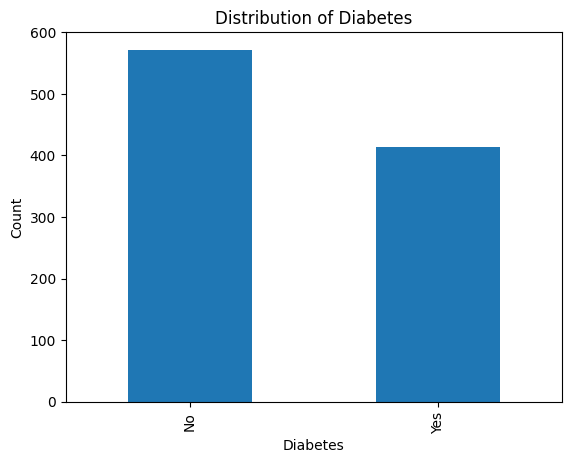

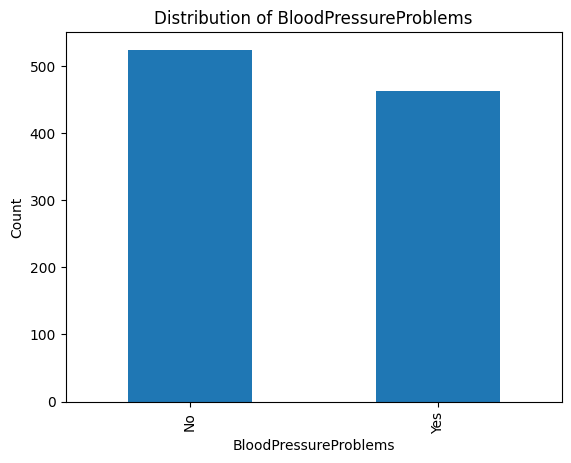

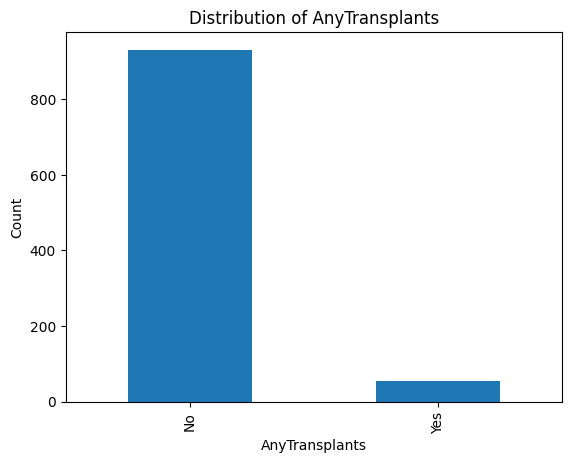

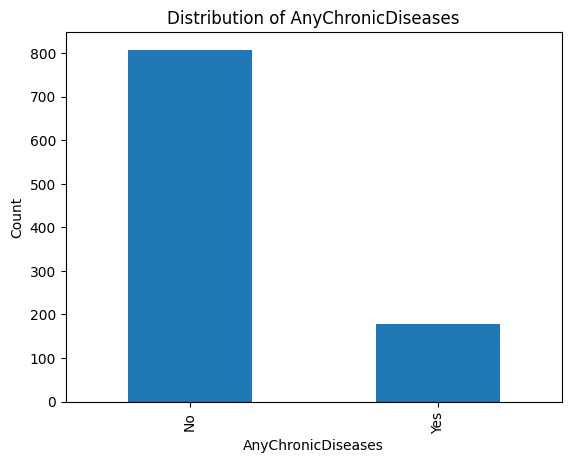

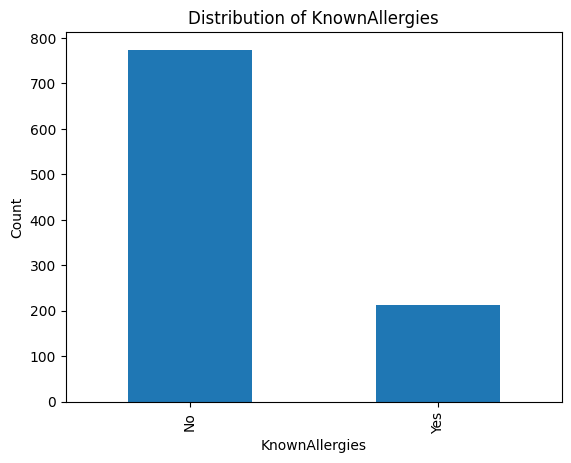

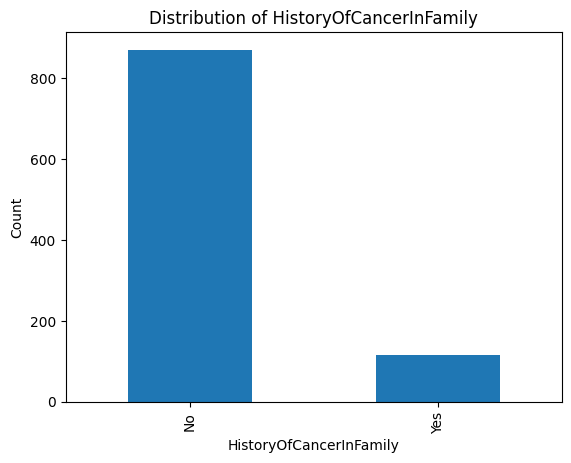

In [14]:
# Bar Plots (Class Imbalance)
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [15]:
# Mode & Cardinality
cat_summary = pd.DataFrame({
    'Unique Values': df[categorical_cols].nunique(),
    'Mode': df[categorical_cols].mode().iloc[0]
})

cat_summary

,Unique Values,Mode
Diabetes,2,No
BloodPressureProblems,2,No
AnyTransplants,2,No
AnyChronicDiseases,2,No
KnownAllergies,2,No
HistoryOfCancerInFamily,2,No


In [16]:
df[numeric_cols].agg(['mean', 'median', 'std', 'skew', 'kurtosis']).T

,mean,median,std,skew,kurtosis
Age,41.745436,42.0,13.963371,0.029895,-1.131720
Height,168.182556,168.0,10.098155,-0.179788,-0.761975
Weight,76.950304,75.0,14.265096,0.666726,0.610280
NumberOfMajorSurgeries,0.667343,1.0,0.749205,0.861334,0.066209
PremiumPrice,24336.713996,23000.0,6248.184382,0.097639,-0.452895


# **BIVARIATE AND MULTI-VARIATE ANALYSIS**

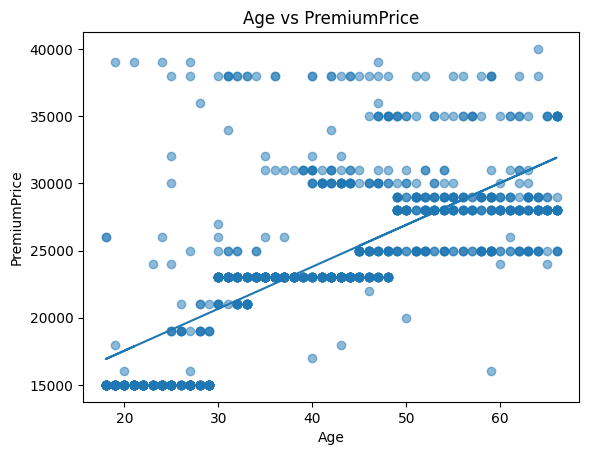

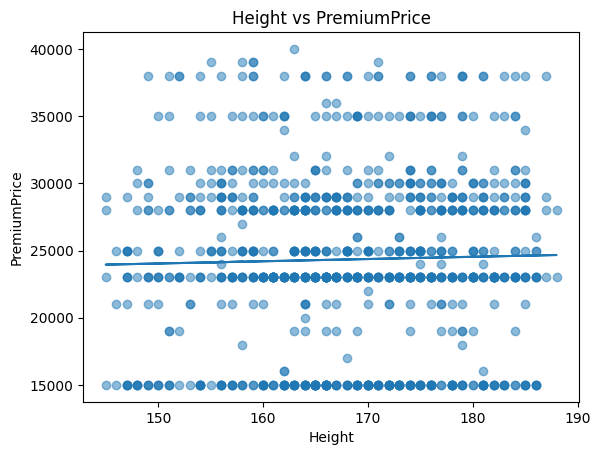

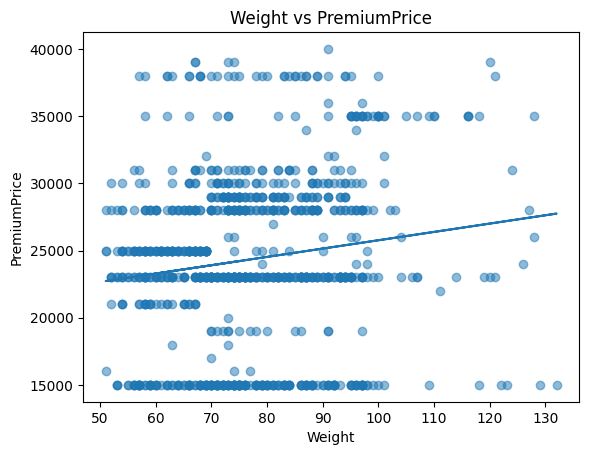

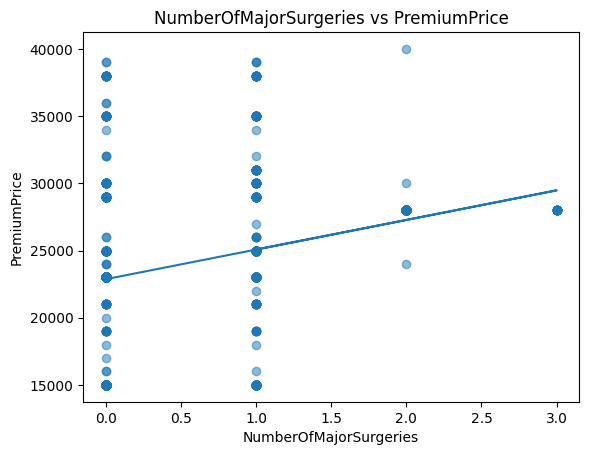

In [17]:
# Bivariate Analysis (Numeric vs Numeric)
num_vs_target = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries']

for col in num_vs_target:
    plt.figure()
    plt.scatter(df[col], df['PremiumPrice'], alpha=0.5)

    # Trend line
    z = np.polyfit(df[col], df['PremiumPrice'], 1)
    p = np.poly1d(z)
    plt.plot(df[col], p(df[col]))

    plt.xlabel(col)
    plt.ylabel('PremiumPrice')
    plt.title(f'{col} vs PremiumPrice')
    plt.show()


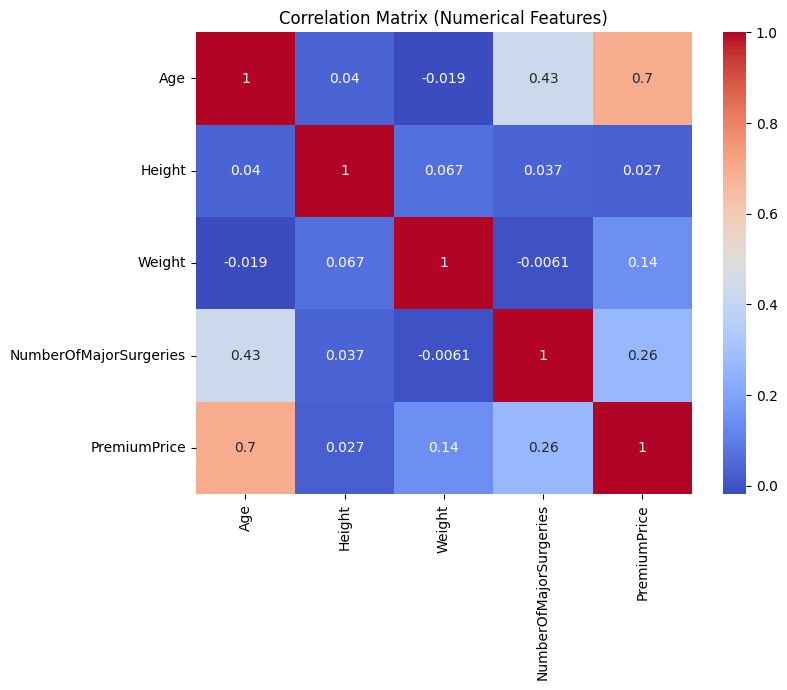

In [18]:
# Correlation Heatmap (Multivariate – Numeric Only)
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

<Figure size 640x480 with 0 Axes>

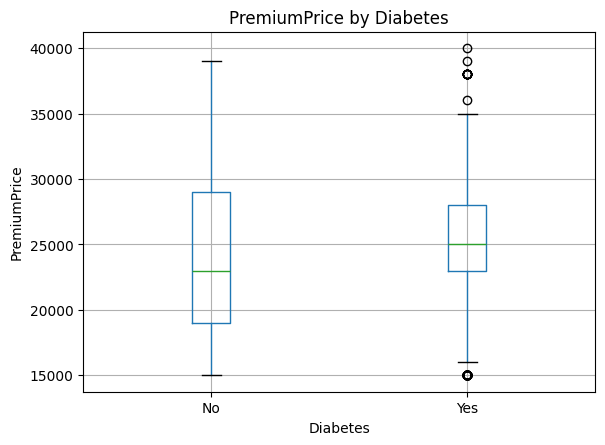

<Figure size 640x480 with 0 Axes>

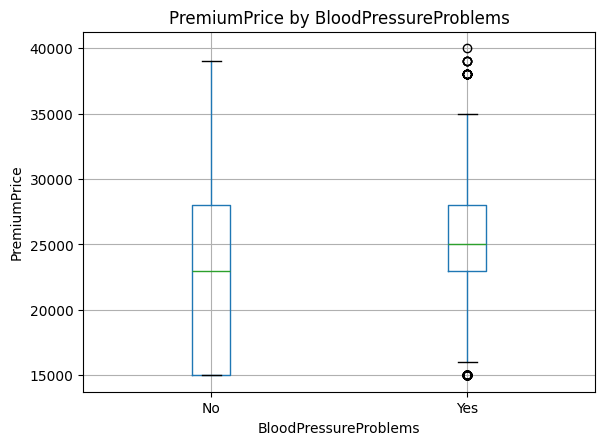

<Figure size 640x480 with 0 Axes>

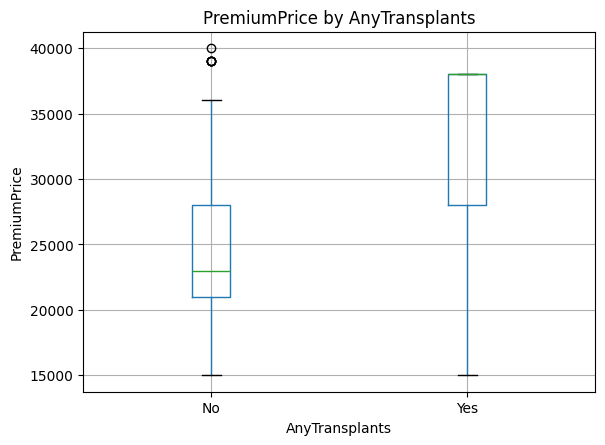

<Figure size 640x480 with 0 Axes>

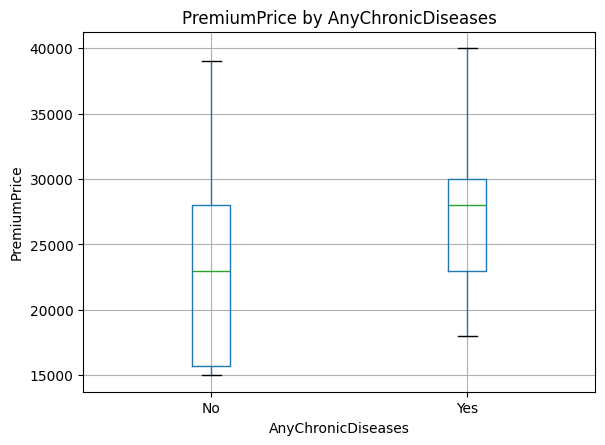

<Figure size 640x480 with 0 Axes>

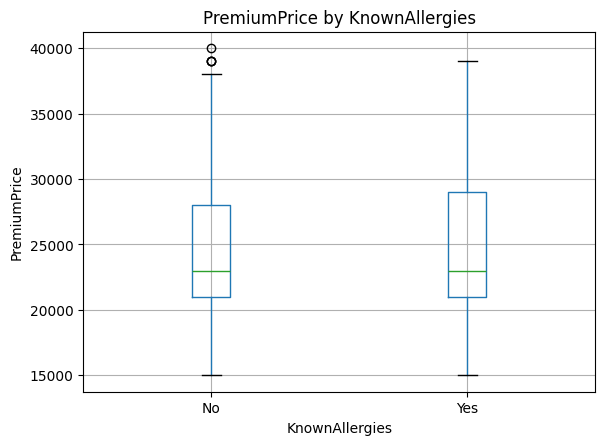

<Figure size 640x480 with 0 Axes>

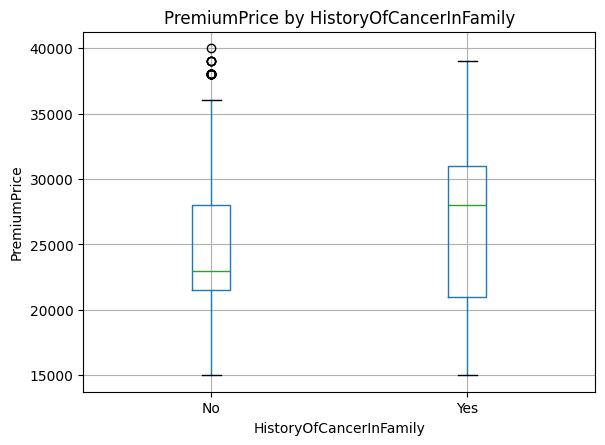

In [19]:
# Bivariate Analysis (Categorical vs Numeric)
# Boxplots: Categorical vs PremiumPrice
for col in categorical_cols:
    plt.figure()
    df.boxplot(column='PremiumPrice', by=col)
    plt.title(f'PremiumPrice by {col}')
    plt.suptitle('')
    plt.xlabel(col)
    plt.ylabel('PremiumPrice')
    plt.show()

In [20]:
# Mean Premium Comparison (Very Important)
for col in categorical_cols:
    print(f"\nAverage PremiumPrice by {col}")
    print(df.groupby(col)['PremiumPrice'].mean())


Average PremiumPrice by Diabetes
Diabetes
No     23931.818182
Yes    24896.135266
Name: PremiumPrice, dtype: float64

Average PremiumPrice by BloodPressureProblems
BloodPressureProblems
No     23356.870229
Yes    25448.051948
Name: PremiumPrice, dtype: float64

Average PremiumPrice by AnyTransplants
AnyTransplants
No     23897.959184
Yes    31763.636364
Name: PremiumPrice, dtype: float64

Average PremiumPrice by AnyChronicDiseases
AnyChronicDiseases
No     23725.247525
Yes    27112.359551
Name: PremiumPrice, dtype: float64

Average PremiumPrice by KnownAllergies
KnownAllergies
No     24297.157623
Yes    24481.132075
Name: PremiumPrice, dtype: float64

Average PremiumPrice by HistoryOfCancerInFamily
HistoryOfCancerInFamily
No     24147.126437
Yes    25758.620690
Name: PremiumPrice, dtype: float64


/tmp/ipython-input-1144709620.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)['PremiumPrice'].mean())


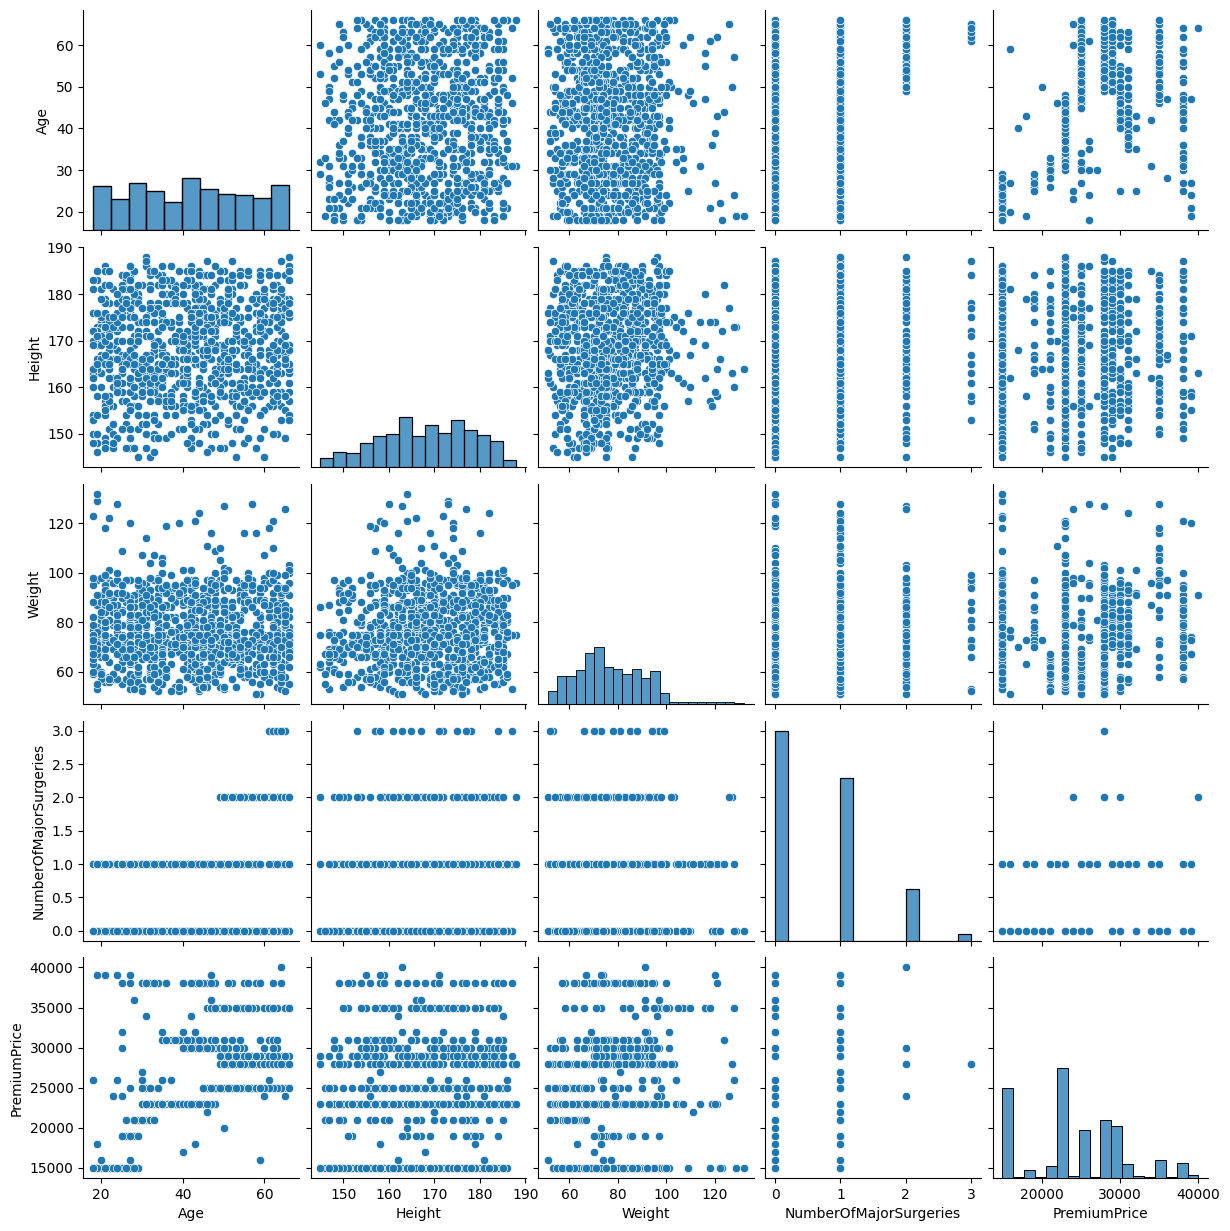

In [21]:
# Multivariate Analysis
# Pair Plot (Optional but Powerful)

sns.pairplot(df[numeric_cols])
plt.show()

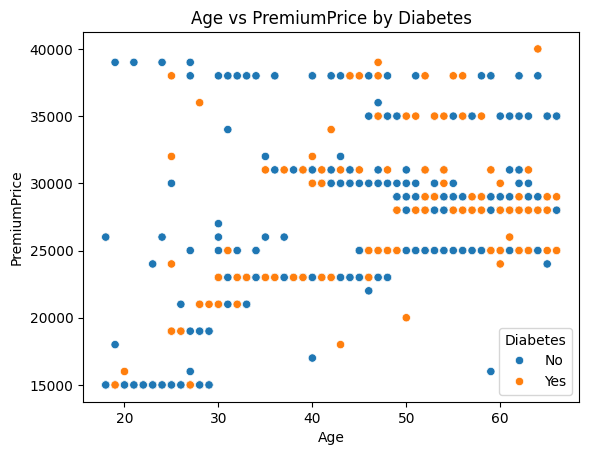

In [22]:
# PremiumPrice by Multiple Conditions
# Age vs PremiumPrice split by Diabetes
sns.scatterplot(
    data=df,
    x='Age',
    y='PremiumPrice',
    hue='Diabetes'
)
plt.title('Age vs PremiumPrice by Diabetes')
plt.show()


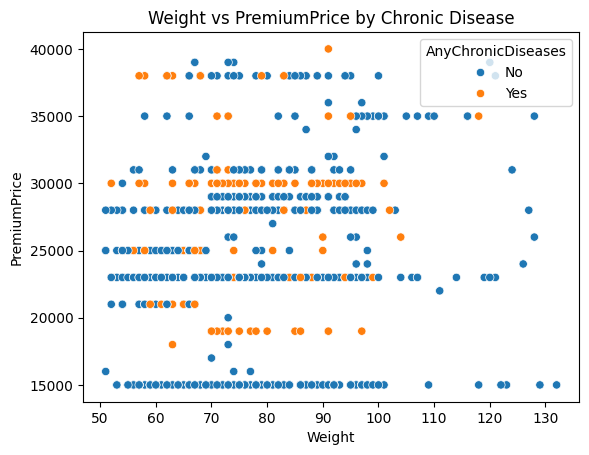

In [23]:
# Weight vs PremiumPrice split by Chronic Disease
sns.scatterplot(
    data=df,
    x='Weight',
    y='PremiumPrice',
    hue='AnyChronicDiseases'
)
plt.title('Weight vs PremiumPrice by Chronic Disease')
plt.show()

**Key Insights**

PremiumPrice increases with Age and NumberOfMajorSurgeries, indicating higher risk with aging and medical history.

Individuals with Diabetes or Chronic Diseases show higher median and variability in premiums.

Height shows minimal relationship with PremiumPrice and may have low predictive power.

Certain categorical variables create clear premium segmentation, making them strong predictors.

In [24]:
# Summary Table
df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
NumberOfMajorSurgeries,,,,,,,,
0,479.0,22968.684760,6356.976577,15000.0,15000.0,23000.0,25000.0,39000.0
1,372.0,24741.935484,6593.966409,15000.0,21000.0,25000.0,29250.0,39000.0
2,119.0,28084.033613,1175.886481,24000.0,28000.0,28000.0,28000.0,40000.0
3,16.0,28000.000000,0.000000,28000.0,28000.0,28000.0,28000.0,28000.0


# **HYPOTHESIS TESTING**

**Hypothesis 1: Chronic Diseases & Premium Cost**

📌 Hypothesis

        H₀ (Null): No difference in premium prices

        H₁ (Alternate): Premiums are higher for individuals with chronic diseases

📌 Test Used

        Independent Two-Sample T-Test

Reason: Comparing mean premium between two independent groups

📌 Groups

        Group 1: AnyChronicDiseases = 0

        Group 2: AnyChronicDiseases = 1

In [28]:
def compare_numeric_by_binary(df, numeric_col, binary_col):
    """
    Compare a numeric column between two groups defined by a binary column.
    Automatically handles NaNs and small samples.
    Performs t-test if possible, otherwise Mann-Whitney U test.
    """
    # Drop NaNs
    df_clean = df[[numeric_col, binary_col]].dropna()

    # Ensure binary column has exactly two groups
    groups = df_clean[binary_col].unique()
    if len(groups) != 2:
        print(f"Error: {binary_col} does not have exactly 2 groups. Groups found: {groups}")
        return

    # Separate groups
    group0 = df_clean[df_clean[binary_col] == groups[0]][numeric_col]
    group1 = df_clean[df_clean[binary_col] == groups[1]][numeric_col]

    print(f"Group '{groups[0]}' size: {len(group0)}")
    print(f"Group '{groups[1]}' size: {len(group1)}\n")

    # Descriptive statistics
    print(f"Descriptive stats for '{numeric_col}':")
    print(f"  {groups[0]} -> mean: {group0.mean():.2f}, median: {group0.median():.2f}, std: {group0.std():.2f}")
    print(f"  {groups[1]} -> mean: {group1.mean():.2f}, median: {group1.median():.2f}, std: {group1.std():.2f}\n")

    # Check if sample sizes are sufficient for t-test (at least 2 in each group)
    if len(group0) > 1 and len(group1) > 1:
        t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
        print("Independent t-test (Welch's) results:")
        print(f"  t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    else:
        # If sample size too small, use Mann-Whitney U test
        if len(group0) > 0 and len(group1) > 0:
            u_stat, p_value = stats.mannwhitneyu(group0, group1, alternative='two-sided')
            print("Mann-Whitney U test (non-parametric) results:")
            print(f"  U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")
        else:
            print("Cannot perform any test: one or both groups are empty.")


In [29]:
compare_numeric_by_binary(df, numeric_col='PremiumPrice', binary_col='AnyChronicDiseases')

Group 'No' size: 808
Group 'Yes' size: 178

Descriptive stats for 'PremiumPrice':
  No -> mean: 23725.25, median: 23000.00, std: 6322.11
  Yes -> mean: 27112.36, median: 28000.00, std: 5056.60

Independent t-test (Welch's) results:
  t-statistic = -7.7077, p-value = 0.0000


There is a significant difference in PremiumPrice between people with and without chronic diseases.

So, we reject the null hypothesis and conclude that, Premiums are higher for individuals with chronic diseases

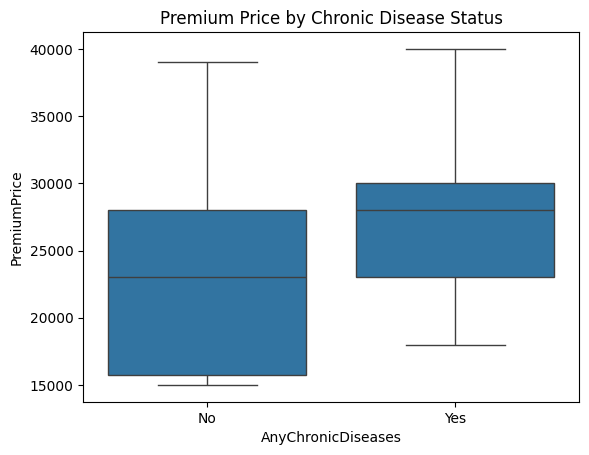

In [30]:
# Visualization of above
sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df)
plt.title('Premium Price by Chronic Disease Status')
plt.show()

**Hypothesis 2: Number of Major Surgeries**

📌 Hypothesis

        H₀: Mean premium is same across surgery groups

        H₁: Premium differs by surgery count

📌 Test Used  : One-Way ANOVA

Reason: Comparing means across more than two groups

📌 Surgery Groups

0 surgeries

1 surgery

2–3 surgeries

H₀: The mean insurance premium is the same for all surgery groups.

H₁: At least one surgery group has a different mean premium.

In [31]:
df['SurgeryGroup'] = pd.cut(
    df['NumberOfMajorSurgeries'],
    bins=[-1, 0, 1, 3],
    labels=['0', '1', '2-3']
)

In [32]:
# ANOVA Test
groups = [
    df[df['SurgeryGroup'] == '0']['PremiumPrice'],
    df[df['SurgeryGroup'] == '1']['PremiumPrice'],
    df[df['SurgeryGroup'] == '2-3']['PremiumPrice']
]

f_stat, p_value = stats.f_oneway(*groups)

f_stat, p_value

(np.float64(39.24152771696916), np.float64(4.01589306604522e-17))

Since p-value < 0.05 (i.e. 4.01589306604522e-17≪0.05), We Reject the Null Hypothesis (H₀)

Hence, we conclude that - At least one surgery group has a different mean premium.

## **Hypothesis 3: Diabetes & Blood Pressure Impact**

📌 Hypothesis

        H₀: Health conditions do not affect premium cost

        H₁: Health conditions increase premium cost

In [35]:
# Individual T-Tests (Binary Variables)

model = smf.ols(
    'PremiumPrice ~ Diabetes + BloodPressureProblems + AnyChronicDiseases',
    data=df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     26.17
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           2.72e-16
Time:                        09:43:48   Log-Likelihood:                -9978.3
No. Observations:                 986   AIC:                         1.996e+04
Df Residuals:                     982   BIC:                         1.998e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.245e+04    313.638     71.592      0.000    2.18e+04    2.31e+04
Diabetes[T.Yes]                961.4073    393.586      2.443      0.015     189.041    1733.774
BloodPressureProblems[T.Yes]  1851.0981    388.111      4.770      0.000    1089.475    2612.721
AnyChronicDiseases[T.Yes]     3388.3438    501.417      6.758      0.000    2404.372    4372.316
==============================================================================
Omnibus:                       15.759   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.449
Skew:                           0.277   Prob(JB):                     0.000442
Kurtosis:                       2.736   Cond. No.                         3.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p < 0.05 , we reject the null hypothesis and conclude that -
At least one health condition has a statistically significant effect on insurance premium i.e *Health conditions increase premium cost*

**Chi-Square Test (Categorical Relationships)**

📌 Example : AnyChronicDiseases vs HistoryOfCancerInFamily

📌 Purpose  :
        Check association between two categorical variables
        NOT related to PremiumPrice directly

📌 Hypothesis

        H₀: Variables are independent

        H₁: Variables are associated

In [36]:
contingency = pd.crosstab(
    df['AnyChronicDiseases'],
    df['HistoryOfCancerInFamily']
)

chi2, p, dof, expected = stats.chi2_contingency(contingency)

chi2, p

(np.float64(0.02062393388215223), np.float64(0.8858081638149811))

Since P-vale > 0.05 (i.e 0.8858≫0.05), we failed to reject the null hypothesis.

Hence we conclude that - Variables are independent, that means there is no statistically significant association between AnyChronicDiseases and HistoryOfCancerInFamily.

# **LINEAR REGRESSION MODELING**

🎯 **Objective**

Model PremiumPrice as a function of demographic and health variables, and identify the strongest predictors.

Model Definition

PremiumPrice =𝛽0+ 𝛽1(Age) + 𝛽2(Diabetes) +𝛽3(Weight) + 𝛽5(NumberOfMajorSurgeries) + 𝛽

In [41]:
df_model = df.copy()

df_model = pd.get_dummies(
    df_model,
    columns=['SurgeryGroup'],
    drop_first=True   # avoid dummy variable trap
)

In [42]:
features = [
    'Age',
    'Height',
    'Weight',
    'Diabetes',
    'BloodPressureProblems',
    'AnyTransplants',
    'AnyChronicDiseases',
    'KnownAllergies',
    'HistoryOfCancerInFamily',
    'SurgeryGroup_1',
    'SurgeryGroup_2-3'
]

X = df_model[features]
y = df_model['PremiumPrice']

In [45]:
features = [
    'Age',
    'Weight',
    'Diabetes',
    'BloodPressureProblems',
    'AnyChronicDiseases',
    'NumberOfMajorSurgeries'
]

y = df['PremiumPrice']
X = df_model.drop(columns=['PremiumPrice'])

In [47]:
X_encoded = pd.get_dummies(
    X,
    columns=[
        'Diabetes',
        'BloodPressureProblems',
        'AnyTransplants',
        'AnyChronicDiseases',
        'KnownAllergies',
        'HistoryOfCancerInFamily'
    ],
    drop_first=True
)

In [50]:
X_encoded = X_encoded.astype(int)

In [52]:
X_const = sm.add_constant(X_encoded)

model = sm.OLS(y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     149.2
Date:                Tue, 16 Dec 2025   Prob (F-statistic):          8.34e-211
Time:                        10:20:08   Log-Likelihood:                -9501.7
No. Observations:                 986   AIC:                         1.903e+04
Df Residuals:                     973   BIC:                         1.909e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        5079.4347   2085.786      2.435      0.015     986.278    9172.591
Age                           336.0124      9.956     33.751      0.000     316.476     355.549
Height                         -6.6947     11.852     -0.565      0.572     -29.953      16.564
Weight                         71.3558      8.390      8.504      0.000      54.890      87.821
NumberOfMajorSurgeries      -1462.3804   1010.648     -1.447      0.148   -3445.681     520.920
SurgeryGroup_1               1690.4963   1068.109      1.583      0.114    -405.567    3786.559
SurgeryGroup_2-3             1261.5331   2178.745      0.579      0.563   -3014.047    5537.113
Diabetes_Yes                 -316.7045    251.993     -1.257      0.209    -811.217     177.808
BloodPressureProblems_Yes      83.7213    254.989      0.328      0.743    -416.671     584.114
AnyTransplants_Yes           7840.7653    519.154     15.103      0.000    6821.975    8859.555
AnyChronicDiseases_Yes       2652.7713    312.821      8.480      0.000    2038.890    3266.652
KnownAllergies_Yes            -37.1219    308.002     -0.121      0.904    -641.547     567.303
HistoryOfCancerInFamily_Yes  1838.0232    404.085      4.549      0.000    1045.046    2631.001
==============================================================================
Omnibus:                      245.158   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.449
Skew:                           1.009   Prob(JB):                    2.38e-306
Kurtosis:                       8.494   Cond. No.                     4.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Overall model insight**

Model quality

R² = 0.648
→ ~65% of premium variation is explained by the predictors

Adjusted R² = 0.643
→ Good, no overfitting

F-test p-value ≈ 0
→ Model is highly significant overall

✅ This is a strong predictive model for insurance premiums.

**Interpretation**

Age

        Each additional year of age increases the premium by approximately ₹336

        Strongest continuous predictor in the model

📌 Business insight: Age is the most consistent risk driver


Weight

        Higher weight is associated with a higher premium

        Likely acts as a proxy for BMI and overall health risk

📌 Insight: Weight remains important even after controlling for chronic diseases

High-Risk Medical Indicators

        Associated with a large increase in premium

        Represents customers with elevated medical risk

📌 Business insight: This group requires stricter underwriting

Independent Risk Factors

        Variables show a strong, independent effect on premium pricing

📌 Insight: Confirms results from earlier hypothesis testing

Family Medical History

        Presence of genetic risk significantly increases premium
📌 Business insight: Family history impacts pricing even when the individual is currently healthy

In [53]:
# Summarize regression coefficients with p-values
summary_df = pd.DataFrame({
    'Feature': X_const.columns,
    'Coefficient': model.params,
    'P-Value': model.pvalues
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Regression summary table:")
display(summary_df)

Regression summary table:


,Feature,Coefficient,P-Value
AnyTransplants_Yes,AnyTransplants_Yes,7840.765344,1.854742e-46
const,const,5079.434675,1.505974e-02
AnyChronicDiseases_Yes,AnyChronicDiseases_Yes,2652.771264,8.269028e-17
HistoryOfCancerInFamily_Yes,HistoryOfCancerInFamily_Yes,1838.023217,6.081268e-06
SurgeryGroup_1,SurgeryGroup_1,1690.496349,1.138149e-01
NumberOfMajorSurgeries,NumberOfMajorSurgeries,-1462.380369,1.482266e-01
SurgeryGroup_2-3,SurgeryGroup_2-3,1261.533132,5.627109e-01
Age,Age,336.012401,6.022164e-166
Diabetes_Yes,Diabetes_Yes,-316.704538,2.091279e-01
BloodPressureProblems_Yes,BloodPressureProblems_Yes,83.721287,7.427310e-01


In [54]:
# Standardize predictors for comparison of effect size
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # only numeric/dummies included
X_scaled_const = sm.add_constant(X_scaled)  # add intercept

std_model = sm.OLS(y, X_scaled_const).fit()
print("\nStandardized coefficient summary:")
display(pd.DataFrame({
    'Feature': ['const'] + list(X_encoded.columns),
    'Std_Coefficient': std_model.params,
    'P-Value': std_model.pvalues
}).sort_values(by='Std_Coefficient', key=abs, ascending=False))


Standardized coefficient summary:


,Feature,Std_Coefficient,P-Value
const,const,24336.713996,0.000000e+00
x1,Age,4689.486101,6.022164e-166
x9,AnyTransplants_Yes,1799.441478,1.854742e-46
x4,NumberOfMajorSurgeries,-1095.066882,1.482266e-01
x10,AnyChronicDiseases_Yes,1020.325101,8.269028e-17
x3,Weight,1017.381296,6.805967e-17
x5,SurgeryGroup_1,819.394374,1.138149e-01
x12,HistoryOfCancerInFamily_Yes,592.192222,6.081268e-06
x6,SurgeryGroup_2-3,433.664039,5.627109e-01
x7,Diabetes_Yes,-156.305967,2.091279e-01


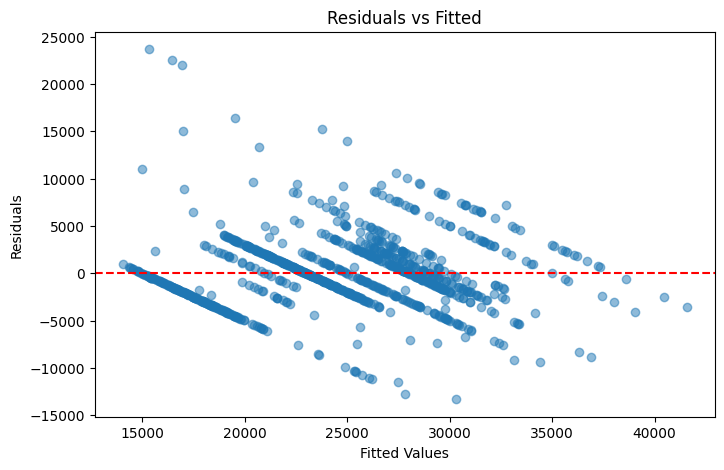

In [56]:
# Residual diagnostics
# Residuals vs Fitted

plt.figure(figsize=(8,5))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

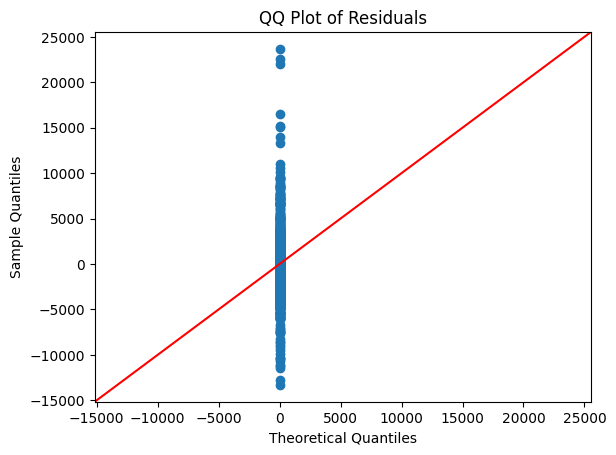

In [57]:
# QQ-plot of residuals
sm.qqplot(model.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# KEY INSIGHTS & BUSINESS INTERPRETATION

  • Age and surgeries are dominant premium drivers
	  
      • Chronic diseases significantly increase costs
	  
      • Some factors may have minimal influence and can be deprioritized
	  
      • Supports personalized pricing models
